In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
column_list = "label,channel_id,coin,timestamp,length,coin_seq,feature_seq,pre_1h_return,pre_1h_price,pre_1h_price_avg,pre_1h_volume,pre_1h_volume_avg,pre_1h_volume_sum,pre_1h_volume_tb,pre_1h_volume_quote,pre_1h_volume_quote_tb,pre_3h_return,pre_3h_price,pre_3h_price_avg,pre_3h_volume,pre_3h_volume_avg,pre_3h_volume_sum,pre_3h_volume_tb,pre_3h_volume_tb_avg,pre_3h_volume_tb_sum,pre_3h_volume_quote,pre_3h_volume_quote_avg,pre_3h_volume_quote_sum,pre_3h_volume_quote_tb,pre_3h_volume_quote_tb_avg,pre_3h_volume_quote_tb_sum,pre_6h_return,pre_6h_price,pre_6h_price_avg,pre_6h_volume,pre_6h_volume_avg,pre_6h_volume_sum,pre_6h_volume_tb,pre_6h_volume_tb_avg,pre_6h_volume_tb_sum,pre_6h_volume_quote,pre_6h_volume_quote_avg,pre_6h_volume_quote_sum,pre_6h_volume_quote_tb,pre_6h_volume_quote_tb_avg,pre_6h_volume_quote_tb_sum,pre_12h_return,pre_12h_price,pre_12h_price_avg,pre_12h_volume,pre_12h_volume_avg,pre_12h_volume_sum,pre_12h_volume_tb,pre_12h_volume_tb_avg,pre_12h_volume_tb_sum,pre_12h_volume_quote,pre_12h_volume_quote_avg,pre_12h_volume_quote_sum,pre_12h_volume_quote_tb,pre_12h_volume_quote_tb_avg,pre_12h_volume_quote_tb_sum,pre_24h_return,pre_24h_price,pre_24h_price_avg,pre_24h_volume,pre_24h_volume_avg,pre_24h_volume_sum,pre_24h_volume_tb,pre_24h_volume_tb_avg,pre_24h_volume_tb_sum,pre_24h_volume_quote,pre_24h_volume_quote_avg,pre_24h_volume_quote_sum,pre_24h_volume_quote_tb,pre_24h_volume_quote_tb_avg,pre_24h_volume_quote_tb_sum,pre_36h_return,pre_36h_price,pre_36h_price_avg,pre_36h_volume,pre_36h_volume_avg,pre_36h_volume_sum,pre_36h_volume_tb,pre_36h_volume_tb_avg,pre_36h_volume_tb_sum,pre_36h_volume_quote,pre_36h_volume_quote_avg,pre_36h_volume_quote_sum,pre_36h_volume_quote_tb,pre_36h_volume_quote_tb_avg,pre_36h_volume_quote_tb_sum,pre_48h_return,pre_48h_price,pre_48h_price_avg,pre_48h_volume,pre_48h_volume_avg,pre_48h_volume_sum,pre_48h_volume_tb,pre_48h_volume_tb_avg,pre_48h_volume_tb_sum,pre_48h_volume_quote,pre_48h_volume_quote_avg,pre_48h_volume_quote_sum,pre_48h_volume_quote_tb,pre_48h_volume_quote_tb_avg,pre_48h_volume_quote_tb_sum,pre_60h_return,pre_60h_price,pre_60h_price_avg,pre_60h_volume,pre_60h_volume_avg,pre_60h_volume_sum,pre_60h_volume_tb,pre_60h_volume_tb_avg,pre_60h_volume_tb_sum,pre_60h_volume_quote,pre_60h_volume_quote_avg,pre_60h_volume_quote_sum,pre_60h_volume_quote_tb,pre_60h_volume_quote_tb_avg,pre_60h_volume_quote_tb_sum,pre_72h_return,pre_72h_price,pre_72h_price_avg,pre_72h_volume,pre_72h_volume_avg,pre_72h_volume_sum,pre_72h_volume_tb,pre_72h_volume_tb_avg,pre_72h_volume_tb_sum,pre_72h_volume_quote,pre_72h_volume_quote_avg,pre_72h_volume_quote_sum,pre_72h_volume_quote_tb,pre_72h_volume_quote_tb_avg,pre_72h_volume_quote_tb_sum,pre_3d_market_cap_usd,pre_3d_market_cap_btc,pre_3d_price_usd,pre_3d_price_btc,pre_3d_volume_usd,pre_3d_volume_btc,pre_3d_twitter_index,pre_3d_reddit_index,pre_3d_alexa_index".split(",")
sample_df = pd.read_csv("../FeatGeneration/test_sample.csv", names=column_list)

In [33]:
sample_df["pre_3d_price_usd"]

0          7.541250
1          0.647368
2          0.002655
3          0.978865
4          0.010391
            ...    
72768      0.010668
72769     11.227056
72770    259.810004
72771      0.223059
72772      0.004450
Name: pre_3d_price_usd, Length: 72773, dtype: float64

In [13]:
X = sample_df[column_list[7:]].values
y = sample_df.label.values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
gbdt_model = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=300, min_samples_leaf=20,max_depth=8,max_features='sqrt', subsample=0.8,random_state=10)
gbdt_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=8, max_features='sqrt',
                           min_samples_leaf=20, min_samples_split=300,
                           random_state=10, subsample=0.8)

In [16]:
y_pred_proba = gbdt_model.predict_proba(X_test)

In [28]:
y_pred_proba_1 = y_pred_proba[:,1]
y_pred = np.zeros_like(y_pred_proba_1)
y_pred[np.where(y_pred_proba_1>=0.25)[0]] = 1
print(classification_report(y_test.astype(int), y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21561
           1       0.89      0.73      0.81       271

    accuracy                           1.00     21832
   macro avg       0.94      0.87      0.90     21832
weighted avg       1.00      1.00      1.00     21832



In [19]:
from sklearn.metrics import precision_recall_curve 
precision, recall, thresholds = precision_recall_curve(y_test.astype(int), y_pred_proba[:,1])

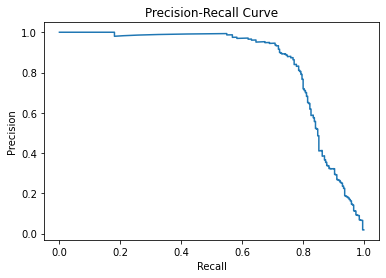

In [20]:
import matplotlib.pyplot as plt
plt.figure("P-R Curve")
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.plot(recall, precision)

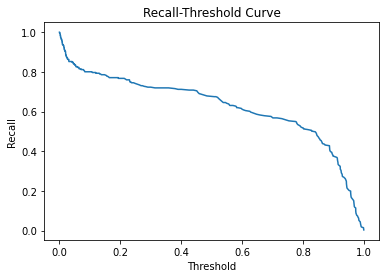

In [21]:
import matplotlib.pyplot as plt
plt.figure("Recall-Threshold Curve")
plt.title("Recall-Threshold Curve")
plt.xlabel("Threshold")
plt.ylabel("Recall")
plt.plot(thresholds, recall[:-1])

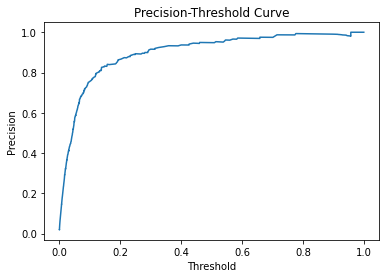

In [22]:
import matplotlib.pyplot as plt
plt.figure("Precision-Threshold Curve")
plt.title("Precision-Threshold Curve")
plt.xlabel("Threshold")
plt.ylabel("Precision")
plt.plot(thresholds, precision[:-1])

In [ ]:
def load_obj(file):
    with open("./PreSelection/" + file, "rb") as f:
        return pickle.load(f)

labeled_sample = pd.read_csv("../Labeled/label.txt", sep=" ", names=["label", "channel_id", "sample_id"])
labeled_sample = labeled_sample[labeled_sample.label!="?"]
labeled_sample.loc[labeled_sample.label == "2", "label"]= "0"

pre_select_sample = pd.read_csv("../PreSelection/preselect_sample", sep="\t", names=["channel_id", "sample_id", "message", "message_wo_stop", "date", "weekday", "on_time", "crypto_signal", "exchange_signal", "keyword_signal", "length"])
pre_select_sample = pd.merge(labeled_sample, pre_select_sample, how="inner", on=["channel_id","sample_id"])
pre_select_sample = pre_select_sample.dropna(axis=0, how="any")

class color: # Text style
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'


def model_train(model, X_train, y_train):
    model.fit(X_train,y_train)
    return model

def model_accuracy(model,X_test,y_test, model_name):
    print("Classifier: ", model_name)
    pred_y = model.predict(X_test)
    print(color.BOLD+'Confusion Matrix:\n'+color.END,confusion_matrix(y_test, pred_y))
    print (color.BOLD+'Report : '+color.END)
    print (classification_report(y_test, pred_y))
    acc_list.append((round(accuracy_score(y_test, pred_y),4)*100))
    pr_list.append((round(precision_score(y_test, pred_y, average='weighted'),4)*100))
    re_list.append((round(recall_score(y_test, pred_y, average='weighted'),4)*100))
    f1_list.append((round(f1_score(y_test, pred_y, average='weighted'),4)*100))
